# Almacenamiento de datos

## Introducción

Vamos a generar una BBDD Relacional para el almacenamiento de los registros que hemos obtenido hasta ahora.

En este momento del proyecto (mayo/23) prepararemos una base de datos con 2 Tablas y posteriormente generaremos una tercera tabla con las variables que habremos generado en el notebook de Engineering para generar #tags. 

## Librerías

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
# import mysql.connector


In [3]:
os.chdir(os.path.split(os.getcwd())[0])
folder=os.getcwd()
folder

'd:\\Data_science\\Javier\\Repositorios\\Proyecto_tienda_online\\src'

## Estructuras de la BBDD

![Estructura_tablas](../Resources/image/Relacion_tablas.jpg)

### a.- Realizando la conexión a la Base de Datos.

In [4]:
# Conectamos con la base de datos
conn = sqlite3.connect("Data/online_shop.db")

# Obtenemos un cursor que utilizaremos para hacer las queries
cursor = conn.cursor()

### b.- Funciones para obtener datos y ver en un dataframe

In [5]:
# Con esta función leemos los datos y lo pasamos a un DataFrame de Pandas
def sql_query(query):

    # Ejecuta la query
    cursor.execute(query)

    # Almacena los datos de la query 
    ans = cursor.fetchall()

    # Obtenemos los nombres de las columnas de la tabla
    names = [description[0] for description in cursor.description]

    return pd.DataFrame(ans,columns=names)

## 1. Construyendo la BBDD

In [14]:
res = cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
# res = cursor.execute("SELECT name FROM sqlite_master WHERE type='view'")
for name in res:
    print(name[0])

PRODUCT
COMMENT
TAGS


#### PRODUCT

In [7]:
query = '''
CREATE TABLE PRODUCT  (
    ID VARCHAR (3),
    PRODUCT VARCHAR (100),
    SLOGAN VARCHAR (100),
    DESCRIPTION VARCHAR (250),
    CHARACTERISTICS VARCHAR (250),
    LISTA_URL VARCHAR (50),
    REGULAR_PRICE INT (3),
    DISCOUNT_PRICE INT (3),
    PRIMARY KEY (ID)
)

'''


cursor.execute(query)

#### COMMENTS

In [8]:
query = '''
CREATE TABLE COMMENT  (
    ID_COMMENT VARCHAR (5),
    ID_PRODUCT VARCHAR (3),
    DATE DATETIME (100),
    RATIO INT (2),
    USERS VARCHAR (50),
    COMMENT VARCHAR (250), 
    PRIMARY KEY (ID_COMMENT),
    FOREIGN KEY (ID_PRODUCT) REFERENCES PRODUCT (ID)
)

'''

cursor.execute(query)

#### TAGS

In [9]:
query = '''
CREATE TABLE TAGS  (
    ID VARCHAR (3),
    JUGUETES INT(1),
    MUEBLES INT(1),
    LENCERIA INT(1),
    MASCULINO INT(1),
    FEMININO INT(1),
    ANAL INT(1),
    BDSM INT(1),
    AMENITIES INT(1),
    PRIMARY KEY (ID),
    FOREIGN KEY (ID) REFERENCES PRODUCT (ID)
)

'''

# En esta tabla hay que convertir primeramente los booleanos en 0 y 1 para guardarla.
# También es importante tener esto en cuenta a la hora de extraer la información.
cursor.execute(query)

### b.- Cargando los datos dentro de la BBDD

In [10]:
df_products=pd.read_csv(r'Data\productos.csv')
print("Long. dataframe",len(df_products.columns))
df_products.head()

Long. dataframe 8


,ID,PRODUCT,SLOGAN,DESCRIPTION,CHARACTERISTICS,LISTA_URL,REGULAR_PRICE,DISCOUNT_PRICE
0,0,MASABOOM,El gran masajeador sexual,"Este es el juguete para todas, todos y todes. ...",Masajeador con forma de micrófonoMaterial: sil...,https://www.amantis.net/masaboom-el-gran-masaj...,69.99,39.99
1,1,MASSAJI,Potente masajeador japonés sumergible de silicona,¿Quieres una velada perfecta tras un largo día...,Masajeador Japonés Massaji Material: Silicona ...,https://www.amantis.net/massaji-potente-masaje...,99.99,44.99
2,2,DIGIT PRO,dedal vibrador con sujeción,Los dedos siempre han sido grandes aliados de ...,Dedal vibradorMaterial: silicona de grado médi...,https://www.amantis.net/digit-pro-dedal-vibrad...,79.99,29.99
3,3,MINI CARNIVAL,mini_masajeador con cuatro cabezales,¿Conoces a MINI+? Puse hoy es tu día de suerte...,Mini masajeador con cuatro cabezalesCabezales ...,https://www.amantis.net/mini-carnival-mini-mas...,34.99,17.99
4,4,LINGÜS,Vibrador para Sexo Oral de amantis,Milenios de sabiduría en el arte del cunniling...,Material: silicona + abs10 modos de vibraciónT...,https://www.amantis.net/lingus-vibrador-sexo-o...,79.99,59.99


In [208]:
df_comments=pd.read_csv(r'Data\comentarios.csv',index_col=False)
# print("Long. dataframe",len(df_comments.columns))
df_comments.rename(columns={"ID":"ID_PRODUCT","Unnamed: 0":"ID_COMMENT"},inplace=True)
# df_comments.drop(columns=['DAY','MONTH','YEAR'],inplace=True)                     # Aplicar en el caso que no hayamos eliminado las columnas de YEAR, MONTH y DAY
# Me falta pasar DATE nuevamente a DATETIME
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID_COMMENT  10479 non-null  int64 
 1   ID_PRODUCT  10479 non-null  int64 
 2   DATE        10479 non-null  object
 3   RATIO       10479 non-null  int64 
 4   USERS       10469 non-null  object
 5   COMMENT     10479 non-null  object
dtypes: int64(3), object(3)
memory usage: 491.3+ KB


In [13]:
lista_products= df_products.values.tolist()                                                #   Pasamos a lista el dataframe

cursor.executemany("INSERT INTO PRODUCT VALUES (?,?,?,?,?,?,?,?)", lista_products)           #   Salvamos directamente todos los datos en la tabla PRODUCTS

lista_comments= df_comments.values.tolist()                                                #   Pasamos a lista el dataframe

cursor.executemany("INSERT INTO COMMENT VALUES (?,?,?,?,?,?)", lista_comments)                 #   Salvamos directamente todos los datos en la tabla COMMENTS

### Generamos las *views* oportunas para el tratamiento de los datos. 

In [15]:
view='''CREATE VIEW COMMENTS_PER_PRODUCT AS SELECT PRODUCT.PRODUCT,COMMENT.DATE,COMMENT.USERS,COMMENT.RATIO ,COMMENT.COMMENT FROM COMMENT JOIN PRODUCT ON PRODUCT.ID=COMMENT.ID_PRODUCT'''
cursor.execute(view)

In [ ]:
conn.commit()
cursor.close()
conn.close()

## 2. Realizando consultas para visualizar datos.

Vamos a verificar los datos cargados visualizando los 10 primeros registros en cada TABLA

In [16]:
query='''SELECT * FROM PRODUCT LIMIT (10)'''
sql_query(query)

,ID,PRODUCT,SLOGAN,DESCRIPTION,CHARACTERISTICS,LISTA_URL,REGULAR_PRICE,DISCOUNT_PRICE
0,0,MASABOOM,El gran masajeador sexual,"Este es el juguete para todas, todos y todes. ...",Masajeador con forma de micrófonoMaterial: sil...,https://www.amantis.net/masaboom-el-gran-masaj...,69.99,39.99
1,1,MASSAJI,Potente masajeador japonés sumergible de silicona,¿Quieres una velada perfecta tras un largo día...,Masajeador Japonés Massaji Material: Silicona ...,https://www.amantis.net/massaji-potente-masaje...,99.99,44.99
2,2,DIGIT PRO,dedal vibrador con sujeción,Los dedos siempre han sido grandes aliados de ...,Dedal vibradorMaterial: silicona de grado médi...,https://www.amantis.net/digit-pro-dedal-vibrad...,79.99,29.99
3,3,MINI CARNIVAL,mini_masajeador con cuatro cabezales,¿Conoces a MINI+? Puse hoy es tu día de suerte...,Mini masajeador con cuatro cabezalesCabezales ...,https://www.amantis.net/mini-carnival-mini-mas...,34.99,17.99
4,4,LINGÜS,Vibrador para Sexo Oral de amantis,Milenios de sabiduría en el arte del cunniling...,Material: silicona + abs10 modos de vibraciónT...,https://www.amantis.net/lingus-vibrador-sexo-o...,79.99,59.99
5,5,MASAJE SEXY con 8 programas,potente masaje mágico de 220v,Probablemente el masajeador más potente que pu...,• Incluye cable extra largo de 3.5 metros ...,https://www.amantis.net/masaje-sexy-8-programa...,69.99,37.99
6,6,MINI+ de amantis,minimasajeador sumergible con 5 cabezales,Por fin el clásico mini masajeador que ha dado...,"• Longitud 10 cm, 2.5cm diámetro de contac...",https://www.amantis.net/mini-amantis-minimasaj...,17.99,6.99
7,7,MINI MASSAJI,masajeador corporal portátil super potente,Está clarísimo que el masaje por vibración apo...,Medidas: 11cm de largo y 4 cm de ancho.Materia...,https://www.amantis.net/mini-massaji-masajeado...,59.99,24.99
8,8,PURE WAND,Sofisticada varita vibradora de metal dorada,"Antes muertas que sencillas, antes muertas que...","Varita Metálica vibradora1,85 cm de diámetro,...",https://www.amantis.net/pure-wand-varita-vibra...,44.99,26.99
9,9,MAX WAND el masajeador sexual más grande y pod...,None,Que te duela algo ya no es excusa para no tene...,Masajeador de silicona médica y ABS libre de f...,https://www.amantis.net/max-wand-el-masajeador...,149.99,79.99


In [17]:
query='''SELECT * FROM COMMENT LIMIT (10)'''
sql_query(query)

,ID_COMMENT,ID_PRODUCT,DATE,RATIO,USERS,COMMENT
0,0,1,2023-01-25,5,Sara,Es un vibrador discreto y eficaz. Es uno de mi...
1,1,1,2023-01-09,5,Jesús,el vibrador de cabecera de mi mujer. Después d...
2,2,1,2022-12-10,3,Sara,Tenía uno de otra tienda y compré este porque ...
3,3,1,2022-10-04,5,Sara,"Es una buena compra. Muy agradable, con difere..."
4,4,1,2022-07-07,5,Álvaro,Buen juguete más centrado en los precalentamie...
5,5,1,2022-06-24,5,Yenifer,Mi juguete de cabecera. Siempre a mano en mi m...
6,6,1,2022-05-05,5,Mirian,Es genial! Llevaba tiempo con ganas de algo as...
7,7,1,2022-01-12,5,Paula,¡Una maravilla! Como estimulación externa pued...
8,8,1,2022-01-03,5,María,Conocí este juguete gracias a las recomendacio...
9,9,1,2021-08-25,5,María de Nieves,Fabuloso. rnPotente pero no molesto.rnMás pequ...


In [18]:
query='''SELECT * FROM TAGS LIMIT (10)'''
sql_query(query)

,ID,JUGUETES,MUEBLES,LENCERIA,MASCULINO,FEMININO,ANAL,BDSM,AMENITIES


In [207]:
query='''SELECT * FROM COMMENTS_PER_PRODUCT LIMIT (10)'''
sql_query(query)

,PRODUCT,DATE,USERS,RATIO,COMMENT
0,MASSAJI,2023-01-25,Sara,5,Es un vibrador discreto y eficaz. Es uno de mi...
1,MASSAJI,2023-01-09,Jesús,5,el vibrador de cabecera de mi mujer. Después d...
2,MASSAJI,2022-12-10,Sara,3,Tenía uno de otra tienda y compré este porque ...
3,MASSAJI,2022-10-04,Sara,5,"Es una buena compra. Muy agradable, con difere..."
4,MASSAJI,2022-07-07,Álvaro,5,Buen juguete más centrado en los precalentamie...
5,MASSAJI,2022-06-24,Yenifer,5,Mi juguete de cabecera. Siempre a mano en mi m...
6,MASSAJI,2022-05-05,Mirian,5,Es genial! Llevaba tiempo con ganas de algo as...
7,MASSAJI,2022-01-12,Paula,5,¡Una maravilla! Como estimulación externa pued...
8,MASSAJI,2022-01-03,María,5,Conocí este juguete gracias a las recomendacio...
9,MASSAJI,2021-08-25,María de Nieves,5,Fabuloso. rnPotente pero no molesto.rnMás pequ...


### Vamos a evaluar los productos en función del descuento que se aplica:

#### Estudio sobre los descuentos que se aplican.

#### Estudio sobre las fechas de los comentarios que se realizan.

#### Estudio sobre el ratio de los comentarios que se realizan.

1.- Visualizamos los datos:

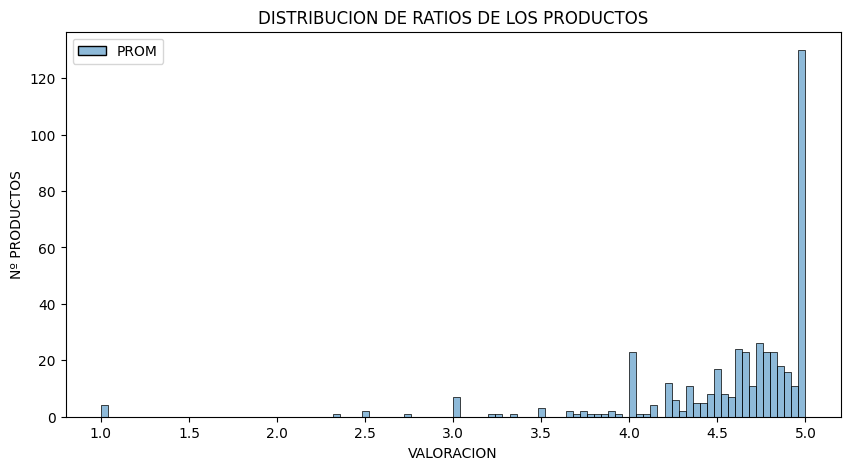

In [195]:
plt.figure(figsize=(10,5))
query='''SELECT PRODUCT,avg(RATIO) as PROM FROM COMMENTS_PER_PRODUCT group BY PRODUCT ORDER BY avg(RATIO) DESC'''
total=sql_query(query)
sns.histplot(data=total,bins=100)

plt.ylabel("Nº PRODUCTOS")
plt.xlabel("VALORACION")
plt.title("DISTRIBUCION DE RATIOS DE LOS PRODUCTOS");

En general se puede observar que los productos se encuentran entre 4.0 y 5.0. 

¿Podemos considerar  los valores por debajo de 4.0 como anómalos? ¿y los valores de 5.0?

Hacemos un *boxplot* para tener una visualización de los datos de la valoración por cuartiles y decidir.

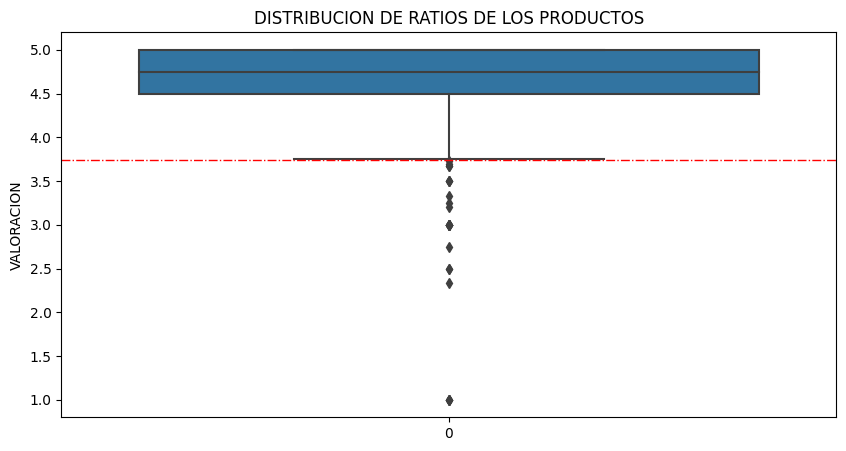

In [146]:
plt.figure(figsize=(10,5))
query='''SELECT PRODUCT,avg(RATIO) as PROM FROM COMMENTS_PER_PRODUCT group BY PRODUCT ORDER BY avg(RATIO) DESC'''
sns.boxplot(data=sql_query(query)['PROM'])
outlier = np.percentile(sql_query(query)['PROM'], 5.5)
plt.axhline(y=outlier, xmin=0, xmax=1,color='r', linewidth= 1,linestyle="-.")
plt.ylabel("VALORACION")
plt.title("DISTRIBUCION DE RATIOS DE LOS PRODUCTOS");

2.- Outliers:

Podemos ver claramente  que los valores por debajo de aprox. 3.5 son *outliers*. 

No es habitual que un producto de la tienda tenga valores por debajo de este cantidad.

¿Cuántos productos serían?

In [200]:
query='''SELECT PRODUCT,avg(RATIO) AS PROM FROM COMMENTS_PER_PRODUCT GROUP BY PRODUCT HAVING avg (RATIO)<3.7'''

outlier=sql_query(query)
print("El número de productos que son outliers es:",len(outlier),"\nlo que representa un porcentaje de",round(len(outlier)/len(total)*100,2),"%")


El número de productos que son outliers es: 23 
lo que representa un porcentaje de 5.15 %


3.- Valor máximo de valoración:

¿Cuántos productos tienen una valoración de 5?

In [204]:
query='''SELECT PRODUCT,avg(RATIO) AS PROM FROM COMMENTS_PER_PRODUCT GROUP BY PRODUCT
 having avg (RATIO)=(SELECT max(RATIO) FROM COMMENTS_PER_PRODUCT GROUP BY PRODUCT)'''
maximo=sql_query(query)

print("El número de productos que tienen una valoración máxima es:",len(maximo),"\nlo que representa un porcentaje de",round(len(maximo)/len(total)*100,2),"%")


El número de productos que tienen una valoración máxima es: 129 
lo que representa un porcentaje de 28.86 %


##### Conclusión:

Los productos tienen una valoración promedio que oscila entre 3,7 y 5.0, siendo ésta la valoración máxima posible.

Con la valoración promedio máxima posible hay 129 productos de los 447, lo que representa el 28,86 % de los productos.

También se observa que por debajo de una valoración promedio de 3,7 hay 23 productos, lo que representa un porcentaje 5,15 %.

#### Estudio sobre los usuarios de los comentarios que se realizan.

En este punto hay que tener en cuenta que tenemos pendiente ahora mismo de generar usuarios distintos cuando se encuentran el mismo usuario dentro del mismo producto, ya que no tiene sentido que sea el mismo usuario y hay que discriminarlo. 

Lo mejor en este punto sería tener users por nick y que esté no pudiera ser el mismo, ya que permitiría poder discernir la autoridad de cada comentario. 

## Cerramos la BBDD.

In [ ]:
conn.commit()
cursor.close()
conn.close()